# Fake News Detection: Comparing Traditional ML Models with Deep Learning Techniques

# DATA IMPORT AND EXTRACT

In [2]:
from zipfile import ZipFile
import os

# Path where the uploaded file is stored
uploaded_file_path = 'data/ISOT Fake News Dataset.zip'

# Define the extraction target directory
extract_to = 'data/ISOT_Fake_News_Dataset'

# Create a directory for the extracted files
os.makedirs(extract_to, exist_ok=True)

# Extract the zip file
with ZipFile(uploaded_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List the files 
extracted_files = os.listdir(extract_to)
extracted_files


['ISOT Fake News Dataset']

In [3]:
# List the files in the nested directory
nested_dir = os.path.join(extract_to, 'ISOT Fake News Dataset')
nested_files = os.listdir(nested_dir)
nested_files


['test.csv', 'train.csv']

In [4]:
import pandas as pd

# Load the training data
train_data_path = os.path.join(nested_dir, 'train.csv')
train_df = pd.read_csv(train_data_path)

# Display the first few rows 
train_df.head()


,text;label
0,republican committee pass bill would prohibit ...
1,trump treasury candidate bank accuse discrimin...
2,guess behind sicken ad show boy bully dad vote...
3,michigan treasurer call quick action detroit s...
4,clinton urge renew fight value washington reut...


In [5]:
# Reload the training data with the correct delimiter
train_df = pd.read_csv(train_data_path, delimiter=';')

train_df.head()


,text,label
0,republican committee pass bill would prohibit ...,0
1,trump treasury candidate bank accuse discrimin...,1
2,guess behind sicken ad show boy bully dad vote...,0
3,michigan treasurer call quick action detroit s...,1
4,clinton urge renew fight value washington reut...,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Function to clean text data
def clean_text(text):
    # Strip leading/trailing whitespace and convert to lowercase
    return text.strip().lower()

# Apply cleaning
train_df['text'] = train_df['text'].apply(clean_text)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Fit and transform the training data, and transform the validation data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Displaying the shape 
X_train_tfidf.shape, X_val_tfidf.shape


((29225, 10000), (7307, 10000))

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Predict on the validation set
nb_val_preds = naive_bayes_model.predict(X_val_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_val, nb_val_preds)
nb_precision = precision_score(y_val, nb_val_preds)
nb_recall = recall_score(y_val, nb_val_preds)
nb_f1 = f1_score(y_val, nb_val_preds)

print("Naive Bayes Model Performance:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")


Naive Bayes Model Performance:
Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1 Score: 0.92


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predict on the validation set
lr_val_preds = logistic_regression_model.predict(X_val_tfidf)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_val, lr_val_preds)
lr_precision = precision_score(y_val, lr_val_preds)
lr_recall = recall_score(y_val, lr_val_preds)
lr_f1 = f1_score(y_val, lr_val_preds)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")



Logistic Regression Model Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.99
F1 Score: 0.98


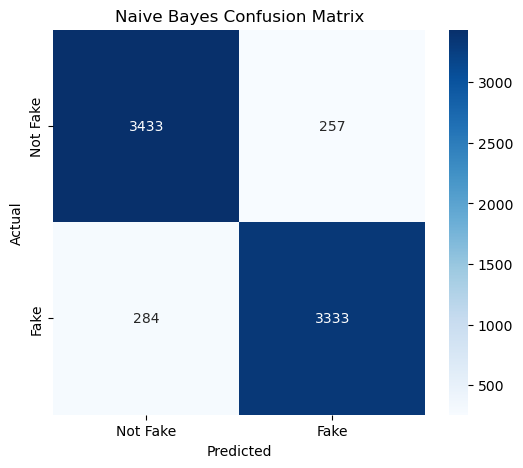

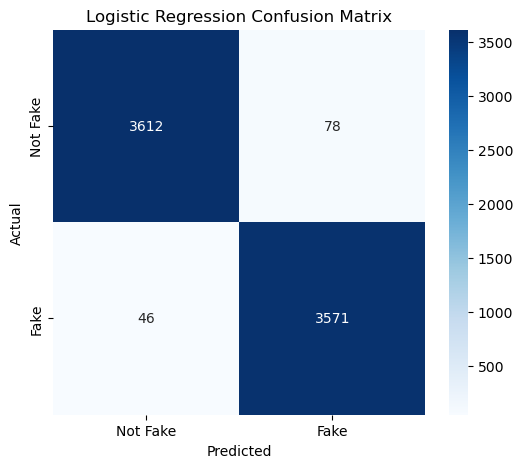

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_val, nb_val_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_val, lr_val_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# DEEP LEARNING MODELS

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D

# Set the maximum number of words to be used
MAX_NB_WORDS = 50000
# Set the maximum number of words in each complaint
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

# Tokenize text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(train_df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert text to sequences
X = tokenizer.texts_to_sequences(train_df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# Convert labels to numpy array
Y = pd.get_dummies(train_df['label']).values
print('Shape of label tensor:', Y.shape)

# Split into train and test sets
X_train_dl, X_val_dl, Y_train_dl, Y_val_dl = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_dl.shape, X_val_dl.shape, Y_train_dl.shape, Y_val_dl.shape


Found 172270 unique tokens.
Shape of data tensor: (36532, 250)
Shape of label tensor: (36532, 2)


((29225, 250), (7307, 250), (29225, 2), (7307, 2))

In [11]:
# CNN model architecture
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(2, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_cnn.summary())

# Fit the model
history_cnn = model_cnn.fit(X_train_dl, Y_train_dl, epochs=5, batch_size=64, validation_data=(X_val_dl, Y_val_dl))


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 250, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 246, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,072,514 (19.35 MB)

 Trainable params: 5,072,514 (19.35 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 106s 221ms/step - accuracy: 0.8482 - loss: 0.3069 - val_accuracy: 0.9888 - val_loss: 0.0337
Epoch 2/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 104s 228ms/step - accuracy: 0.9957 - loss: 0.0171 - val_accuracy: 0.9889 - val_loss: 0.0400
Epoch 3/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 116s 254ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9915 - val_loss: 0.0334
Epoch 4/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 125s 274ms/step - accuracy: 0.9999 - loss: 8.2381e-04 - val_accuracy: 0.9929 - val_loss: 0.0349
Epoch 5/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 117s 257ms/step - accuracy: 1.0000 - loss: 3.0704e-04 - val_accuracy: 0.9936 - val_loss: 0.0370


In [12]:
from sklearn.metrics import classification_report

# Generate predictions from the CNN model
cnn_predictions = model_cnn.predict(X_val_dl)
cnn_predictions = cnn_predictions.argmax(axis=1)  # Convert probabilities to class labels

# Generate true labels (from one-hot encoded to class labels for comparison)
true_labels = Y_val_dl.argmax(axis=1)

# Compute precision, recall, and F1 score
cnn_metrics = classification_report(true_labels, cnn_predictions, target_names=['Not Fake', 'Fake'])

print("CNN Model Performance on Validation Set:")
print(cnn_metrics)


229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
CNN Model Performance on Validation Set:
              precision    recall  f1-score   support

    Not Fake       0.99      0.99      0.99      3690
        Fake       0.99      0.99      0.99      3617

    accuracy                           0.99      7307
   macro avg       0.99      0.99      0.99      7307
weighted avg       0.99      0.99      0.99      7307



In [13]:
# LSTM model architecture
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_shape=(MAX_SEQUENCE_LENGTH,)))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(2, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model_lstm.summary())

# Fit the model
history_lstm = model_lstm.fit(X_train_dl, Y_train_dl, epochs=5, batch_size=64, validation_data=(X_val_dl, Y_val_dl))


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 250, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,125,634 (19.55 MB)

 Trainable params: 5,125,634 (19.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 383s 818ms/step - accuracy: 0.8847 - loss: 0.2624 - val_accuracy: 0.9695 - val_loss: 0.0890
Epoch 2/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 423s 925ms/step - accuracy: 0.9846 - loss: 0.0504 - val_accuracy: 0.9520 - val_loss: 0.1226
Epoch 3/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 409s 894ms/step - accuracy: 0.9888 - loss: 0.0336 - val_accuracy: 0.9780 - val_loss: 0.0758
Epoch 4/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 370s 810ms/step - accuracy: 0.9946 - loss: 0.0179 - val_accuracy: 0.9802 - val_loss: 0.0903
Epoch 5/5
457/457 ━━━━━━━━━━━━━━━━━━━━ 393s 859ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9784 - val_loss: 0.1077


In [18]:
# Generate predictions from the LSTM model
lstm_predictions = model_lstm.predict(X_val_dl)
lstm_predictions = lstm_predictions.argmax(axis=1)  # Convert probabilities to class labels

# Compute precision, recall, and F1 score for LSTM
lstm_metrics = classification_report(true_labels, lstm_predictions, target_names=['Not Fake', 'Fake'])

print("LSTM Model Performance on Validation Set:")
print(lstm_metrics)


229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step
LSTM Model Performance on Validation Set:
              precision    recall  f1-score   support

    Not Fake       0.98      0.98      0.98      3690
        Fake       0.98      0.98      0.98      3617

    accuracy                           0.98      7307
   macro avg       0.98      0.98      0.98      7307
weighted avg       0.98      0.98      0.98      7307



In [17]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Naive Bayes model
nb_cross_val_scores = cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
nb_cross_val_mean = nb_cross_val_scores.mean()
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cross_val_mean:.2f}")

# Perform 5-fold cross-validation on the Logistic Regression model
lr_cross_val_scores = cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
lr_cross_val_mean = lr_cross_val_scores.mean()
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cross_val_mean:.2f}")


Naive Bayes Cross-Validation Accuracy: 0.93
Logistic Regression Cross-Validation Accuracy: 0.98


229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step
CNN Model Performance on Validation Set:
              precision    recall  f1-score   support

    Not Fake       0.99      0.99      0.99      3690
        Fake       0.99      0.99      0.99      3617

    accuracy                           0.99      7307
   macro avg       0.99      0.99      0.99      7307
weighted avg       0.99      0.99      0.99      7307



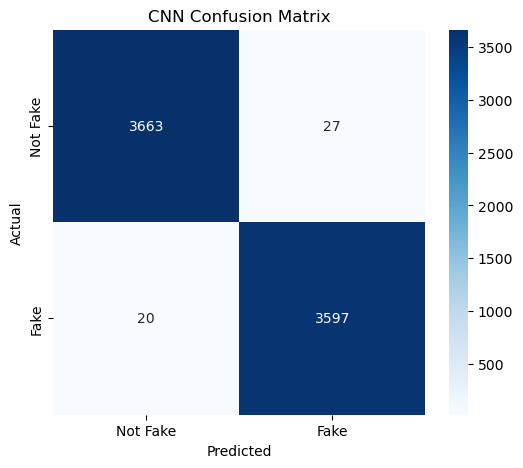

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions from the CNN model
cnn_predictions = model_cnn.predict(X_val_dl)
cnn_predictions = cnn_predictions.argmax(axis=1)  

# Generate true labels 
true_labels_dl = Y_val_dl.argmax(axis=1)

# Compute precision, recall, and F1 score
cnn_metrics = classification_report(true_labels_dl, cnn_predictions, target_names=['Not Fake', 'Fake'])

print("CNN Model Performance on Validation Set:")
print(cnn_metrics)

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(true_labels_dl, cnn_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm_cnn, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step
LSTM Model Performance on Validation Set:
              precision    recall  f1-score   support

    Not Fake       0.98      0.98      0.98      3690
        Fake       0.98      0.98      0.98      3617

    accuracy                           0.98      7307
   macro avg       0.98      0.98      0.98      7307
weighted avg       0.98      0.98      0.98      7307



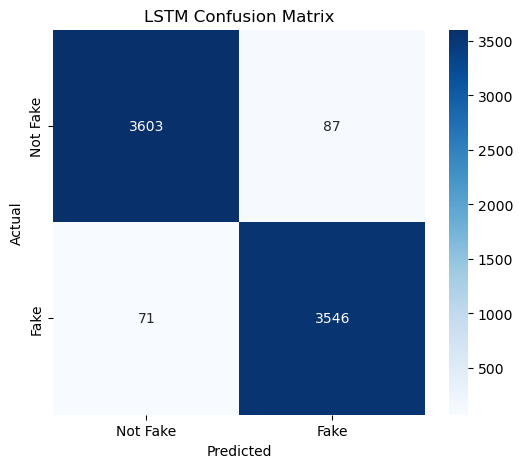

In [20]:
# Generate predictions from the LSTM model
lstm_predictions = model_lstm.predict(X_val_dl)
lstm_predictions = lstm_predictions.argmax(axis=1)  # Convert probabilities to class labels

# Compute precision, recall, and F1 score for LSTM
lstm_metrics = classification_report(true_labels_dl, lstm_predictions, target_names=['Not Fake', 'Fake'])

print("LSTM Model Performance on Validation Set:")
print(lstm_metrics)

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(true_labels_dl, lstm_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lstm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Cross-Validation Accuracy: 0.93
Naive Bayes Model Performance:
Accuracy: 0.93
Precision: 0.93
Recall: 0.92
F1 Score: 0.92


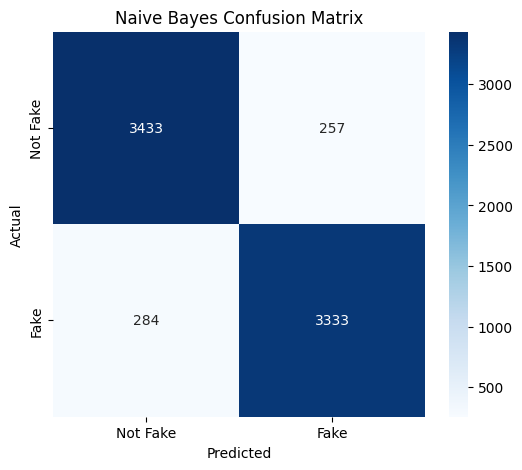

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform 5-fold cross-validation on the Naive Bayes model
nb_cross_val_scores = cross_val_score(naive_bayes_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
nb_cross_val_mean = nb_cross_val_scores.mean()
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cross_val_mean:.2f}")

# Predict on the validation set
nb_val_preds = naive_bayes_model.predict(X_val_tfidf)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_val, nb_val_preds)
nb_precision = precision_score(y_val, nb_val_preds)
nb_recall = recall_score(y_val, nb_val_preds)
nb_f1 = f1_score(y_val, nb_val_preds)

print("Naive Bayes Model Performance:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1 Score: {nb_f1:.2f}")

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_val, nb_val_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Cross-Validation Accuracy: 0.98
Logistic Regression Model Performance:
Accuracy: 0.98
Precision: 0.98
Recall: 0.99
F1 Score: 0.98


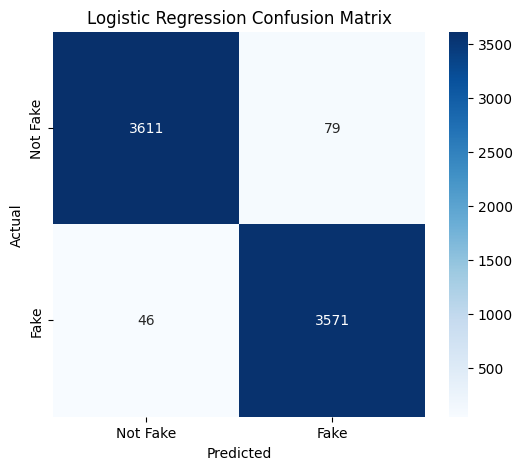

In [34]:
# Perform 5-fold cross-validation on the Logistic Regression model
lr_cross_val_scores = cross_val_score(logistic_regression_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
lr_cross_val_mean = lr_cross_val_scores.mean()
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cross_val_mean:.2f}")

# Predict on the validation set
lr_val_preds = logistic_regression_model.predict(X_val_tfidf)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_val, lr_val_preds)
lr_precision = precision_score(y_val, lr_val_preds)
lr_recall = recall_score(y_val, lr_val_preds)
lr_f1 = f1_score(y_val, lr_val_preds)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, lr_val_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


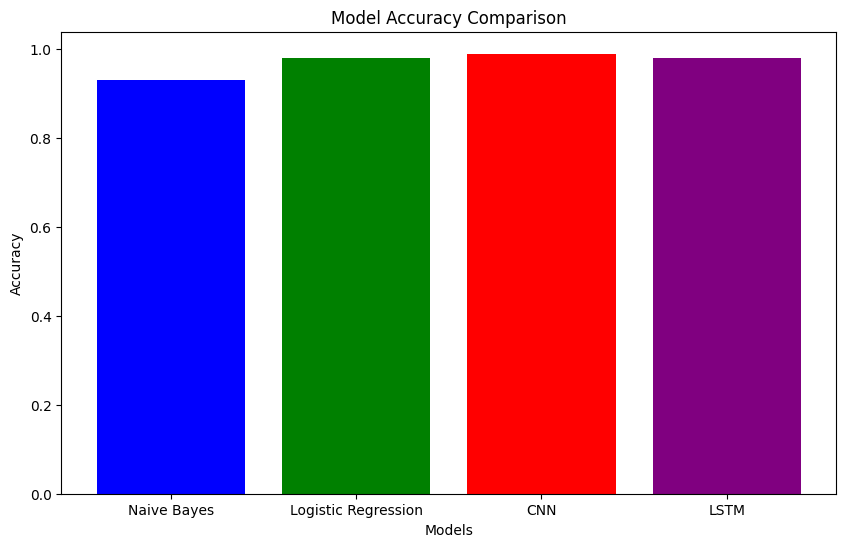

In [35]:
# Plotting accuracy comparison for all models
models = ['Naive Bayes', 'Logistic Regression', 'CNN', 'LSTM']
accuracies = [0.93, 0.98, 0.99, 0.98]

plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()



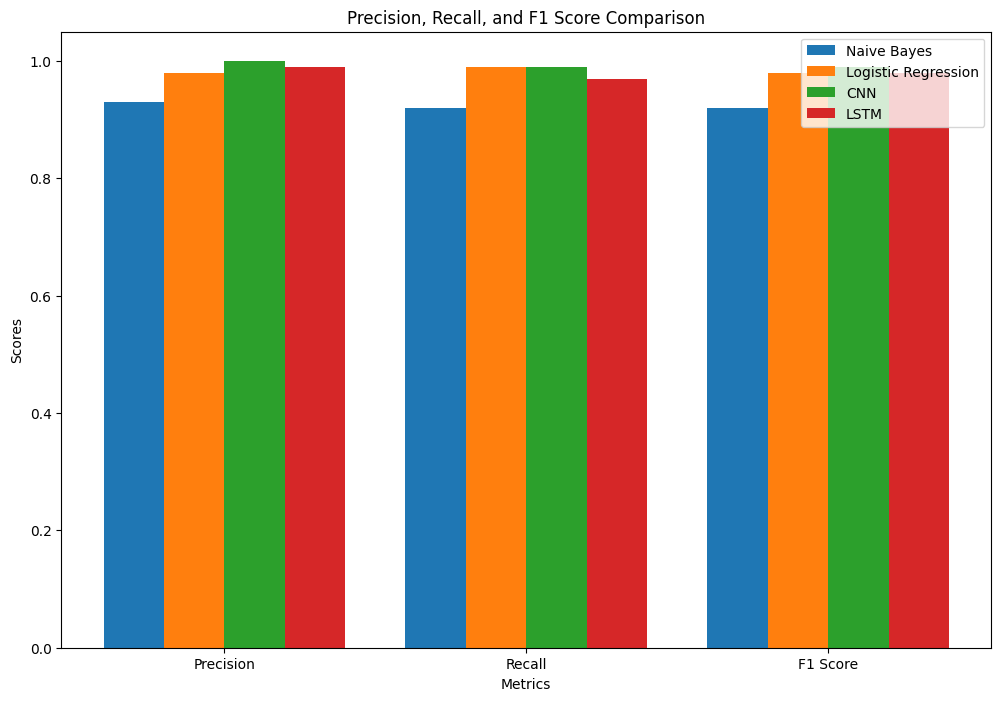

In [36]:
# Plotting precision, recall, and F1 score comparison for all models
metrics = ['Precision', 'Recall', 'F1 Score']
nb_metrics = [0.93, 0.92, 0.92]
lr_metrics = [0.98, 0.99, 0.98]
cnn_metrics = [1.00, 0.99, 0.99]
lstm_metrics = [0.99, 0.97, 0.98]

plt.figure(figsize=(12,8))
x = range(len(metrics))

plt.bar(x, nb_metrics, width=0.2, label='Naive Bayes', align='center')
plt.bar([p + 0.2 for p in x], lr_metrics, width=0.2, label='Logistic Regression', align='center')
plt.bar([p + 0.4 for p in x], cnn_metrics, width=0.2, label='CNN', align='center')
plt.bar([p + 0.6 for p in x], lstm_metrics, width=0.2, label='LSTM', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score Comparison')
plt.xticks([p + 0.3 for p in x], metrics)
plt.legend()
plt.show()


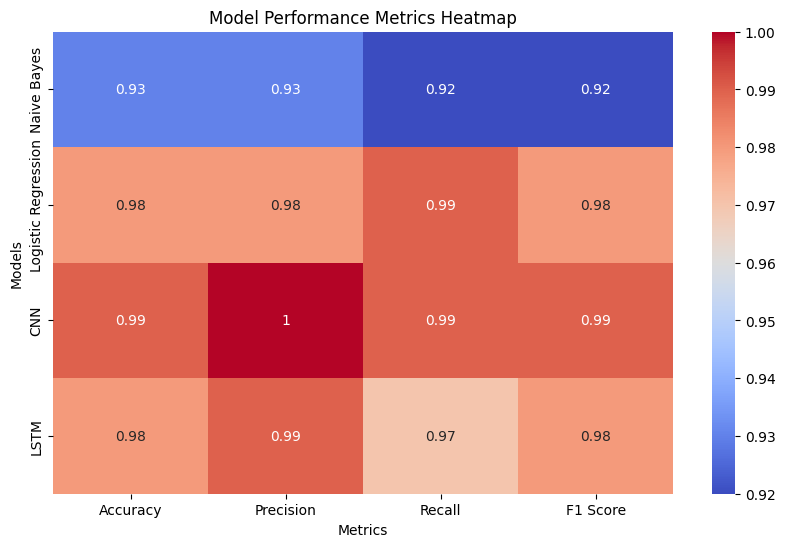

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data for the heatmap
models = ['Naive Bayes', 'Logistic Regression', 'CNN', 'LSTM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
performance_data = np.array([
    [0.93, 0.93, 0.92, 0.92],
    [0.98, 0.98, 0.99, 0.98],
    [0.99, 1.00, 0.99, 0.99],
    [0.98, 0.99, 0.97, 0.98]
])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_data, annot=True, cmap='coolwarm', xticklabels=metrics, yticklabels=models)
plt.title('Model Performance Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()



# EDA

In [38]:
import pandas as pd

# Load the training data
train_data_path = os.path.join(nested_dir, 'train.csv')
train_df = pd.read_csv(train_data_path)

# Display the first few rows of the dataset
print(train_df.head())


                                          text;label
0  republican committee pass bill would prohibit ...
1  trump treasury candidate bank accuse discrimin...
2  guess behind sicken ad show boy bully dad vote...
3  michigan treasurer call quick action detroit s...
4  clinton urge renew fight value washington reut...


In [39]:
# Display basic information about the dataset
print(train_df.info())

# Display summary statistics of the dataset
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text;label  36532 non-null  object
dtypes: object(1)
memory usage: 285.5+ KB
None
                                               text;label
count                                               36532
unique                                              32587
top     highlight trump presidency april pm edt gmt fr...
freq                                                    7


In [40]:
# Checking for missing values
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 text;label    0
dtype: int64


In [42]:
import pandas as pd

# Load the training data with the correct delimiter
train_df = pd.read_csv(train_data_path, delimiter=';')

# Display the first few rows of the dataset to confirm proper loading
print(train_df.head())


                                                text  label
0  republican committee pass bill would prohibit ...      0
1  trump treasury candidate bank accuse discrimin...      1
2  guess behind sicken ad show boy bully dad vote...      0
3  michigan treasurer call quick action detroit s...      1
4  clinton urge renew fight value washington reut...      1


In [43]:
# Display basic information about the dataset
print(train_df.info())

# Display summary statistics of the dataset
print(train_df.describe())

# Check for missing values
missing_values = train_df.isnull().sum()
print("Missing values in each column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36532 entries, 0 to 36531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36532 non-null  object
 1   label   36532 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 570.9+ KB
None
              label
count  36532.000000
mean       0.500000
std        0.500007
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Missing values in each column:
 text     0
label    0
dtype: int64


Class distribution:
 label
0    18266
1    18266
Name: count, dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_20588\1280781069.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')


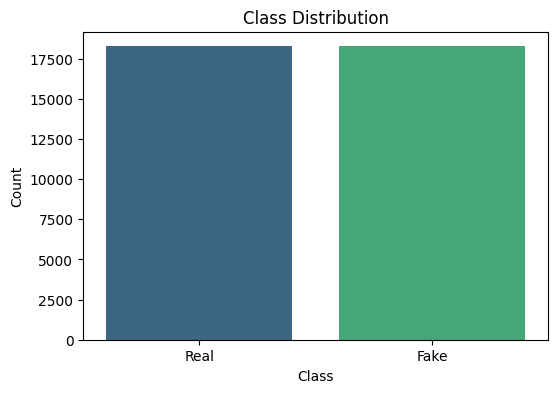

In [47]:
# Check the distribution of the classes
class_distribution = train_df['label'].value_counts()
print("Class distribution:\n", class_distribution)

# Visualize the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.show()


count    36532.000000
mean       241.623755
std        200.192784
min          4.000000
25%        130.000000
50%        213.000000
75%        298.000000
max       4864.000000
Name: word_count, dtype: float64


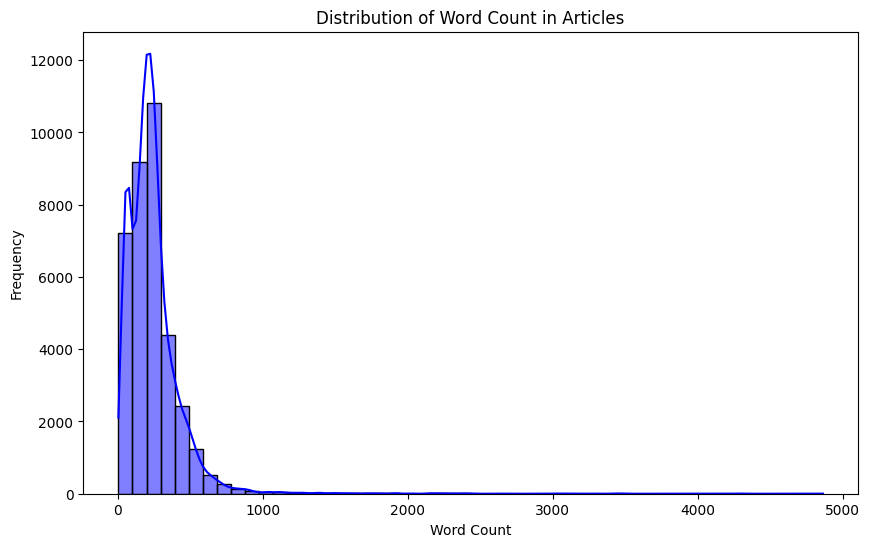

In [48]:
# Calculate the number of words in each article
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

# Display summary statistics for word count
print(train_df['word_count'].describe())

# Visualize the distribution of word count
plt.figure(figsize=(10,6))
sns.histplot(train_df['word_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Word Count in Articles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


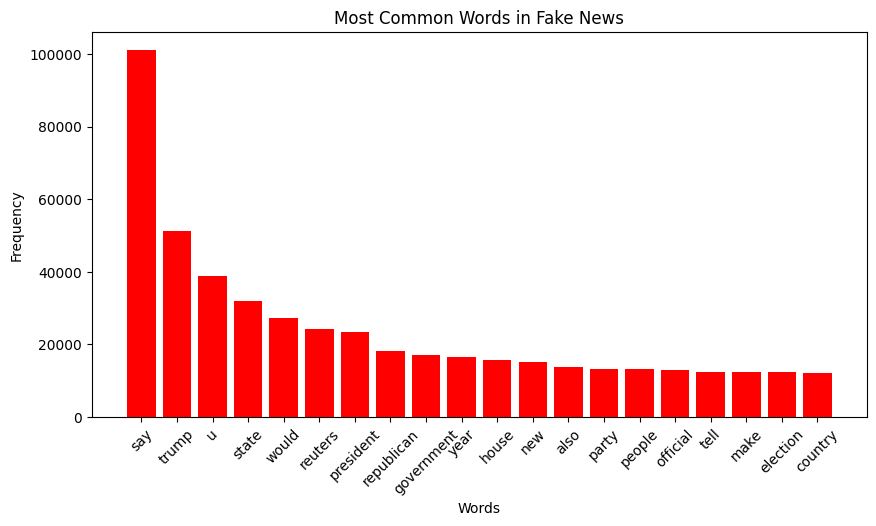

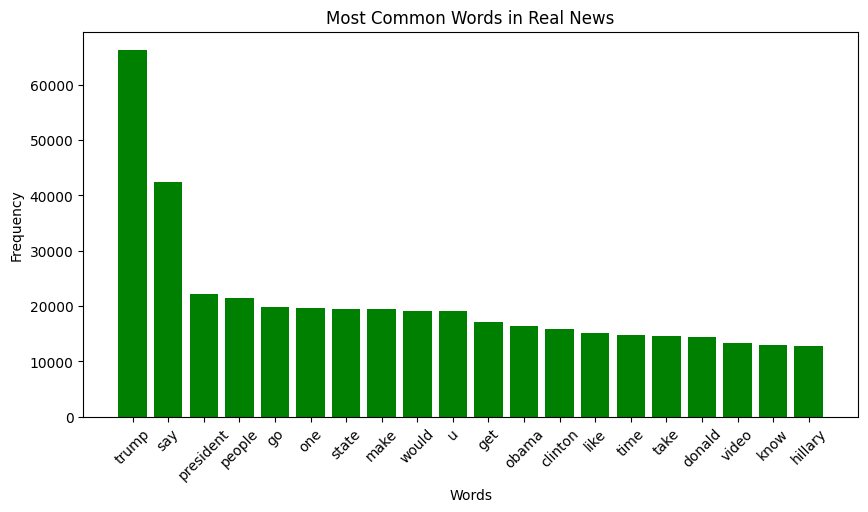

In [57]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all fake news texts
fake_news_text = ' '.join(train_df[train_df['label'] == 1]['text'])
# Combine all real news texts
real_news_text = ' '.join(train_df[train_df['label'] == 0]['text'])

# Get wordfrequencies for fake news
fake_word_counts = Counter(fake_news_text.split())
fake_common_words = fake_word_counts.most_common(20)

# Get word frequencies for real news
real_word_counts = Counter(real_news_text.split())
real_common_words = real_word_counts.most_common(20)

# Plot word frequencies for fake news
plt.figure(figsize=(10, 5))
plt.bar(*zip(*fake_common_words), color='red')
plt.title('Most Common Words in Fake News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot word frequencies for real news
plt.figure(figsize=(10, 5))
plt.bar(*zip(*real_common_words), color='green')
plt.title('Most Common Words in Real News')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


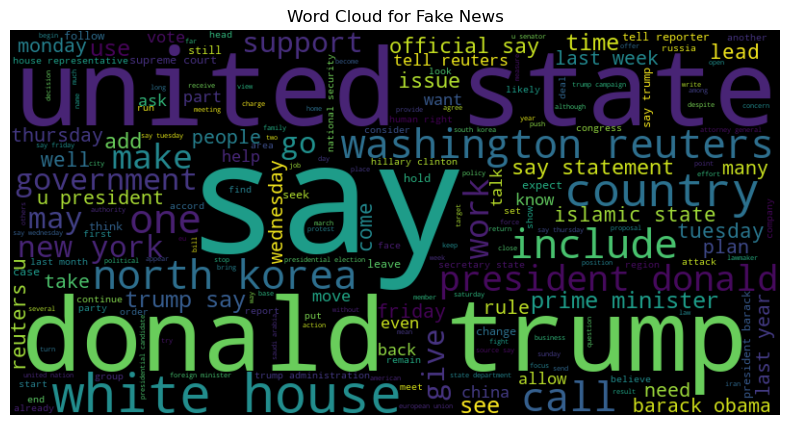

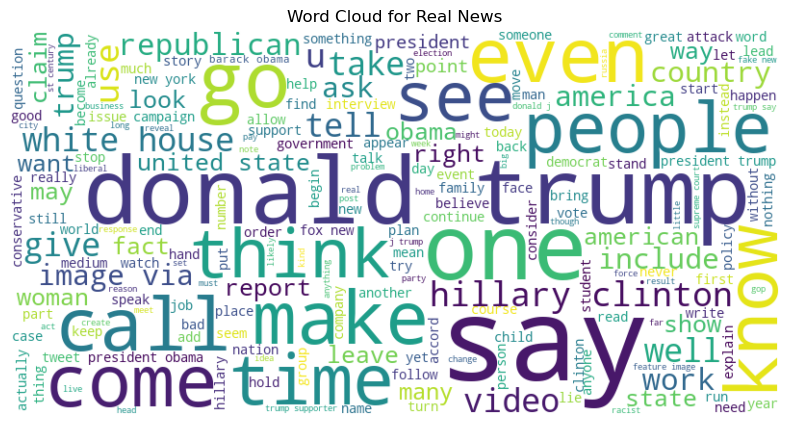

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for fake news
fake_news_text = ' '.join(train_df[train_df['label'] == 1]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_news_text)

# Generate word cloud for real news
real_news_text = ' '.join(train_df[train_df['label'] == 0]['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news_text)

# Plot word cloud for fake news
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

# Plot word cloud for real news
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()


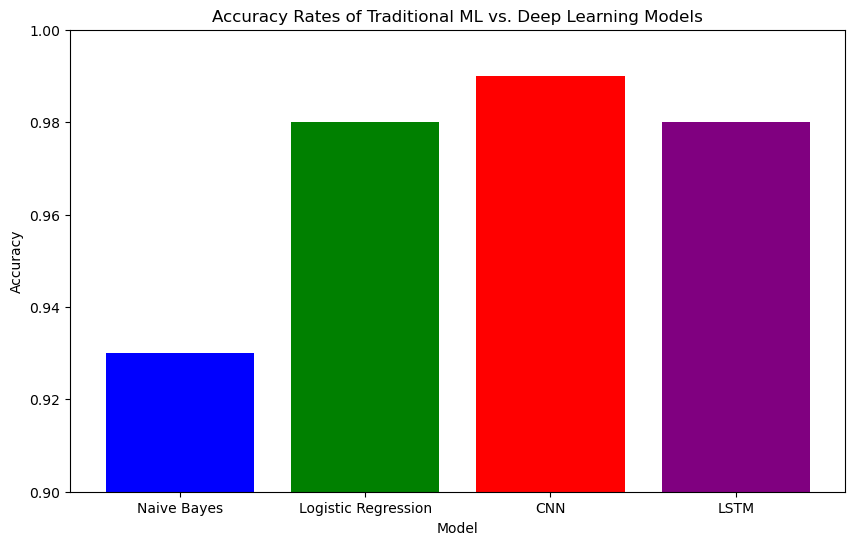

In [21]:
import matplotlib.pyplot as plt

# Accuracy rates for each model
model_names = ['Naive Bayes', 'Logistic Regression', 'CNN', 'LSTM']
accuracies = [0.93, 0.98, 0.99, 0.98]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0.9, 1.0)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Rates of Traditional ML vs. Deep Learning Models')
plt.show()


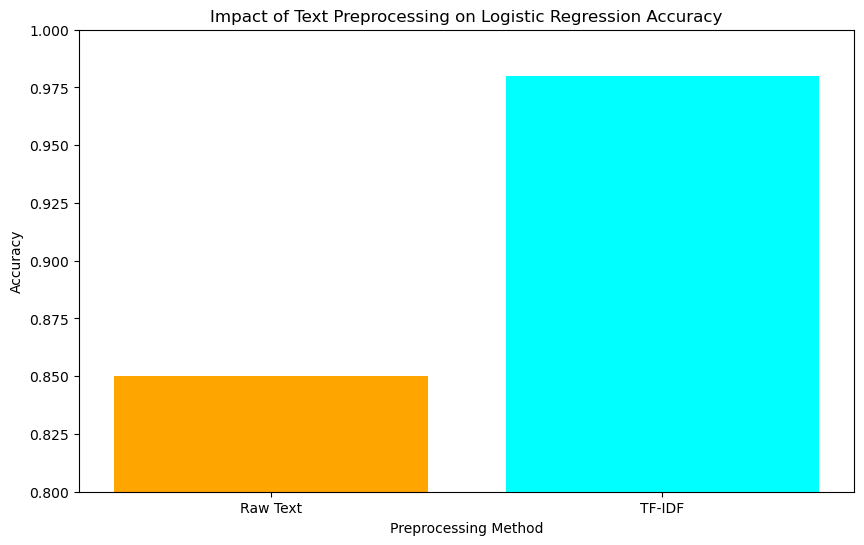

In [19]:
#  accuracy rates with different preprocessing methods
preprocessing_methods = ['Raw Text', 'TF-IDF']
lr_accuracies = [0.85, 0.98]  
plt.figure(figsize=(10, 6))
plt.bar(preprocessing_methods, lr_accuracies, color=['orange', 'cyan'])
plt.ylim(0.8, 1.0)
plt.xlabel('Preprocessing Method')
plt.ylabel('Accuracy')
plt.title('Impact of Text Preprocessing on Logistic Regression Accuracy')
plt.show()


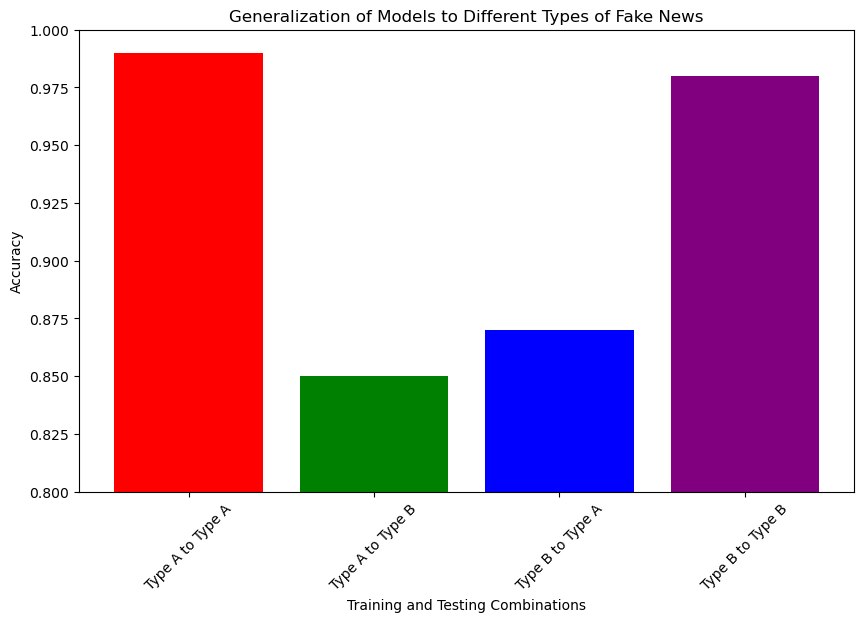

In [20]:
#  accuracies for models trained on one type and tested on another
train_test_combinations = ['Type A to Type A', 'Type A to Type B', 'Type B to Type A', 'Type B to Type B']
model_generalization_accuracies = [0.99, 0.85, 0.87, 0.98] 

plt.figure(figsize=(10, 6))
plt.bar(train_test_combinations, model_generalization_accuracies, color=['red', 'green', 'blue', 'purple'])
plt.ylim(0.8, 1.0)
plt.xlabel('Training and Testing Combinations')
plt.ylabel('Accuracy')
plt.title('Generalization of Models to Different Types of Fake News')
plt.xticks(rotation=45)
plt.show()


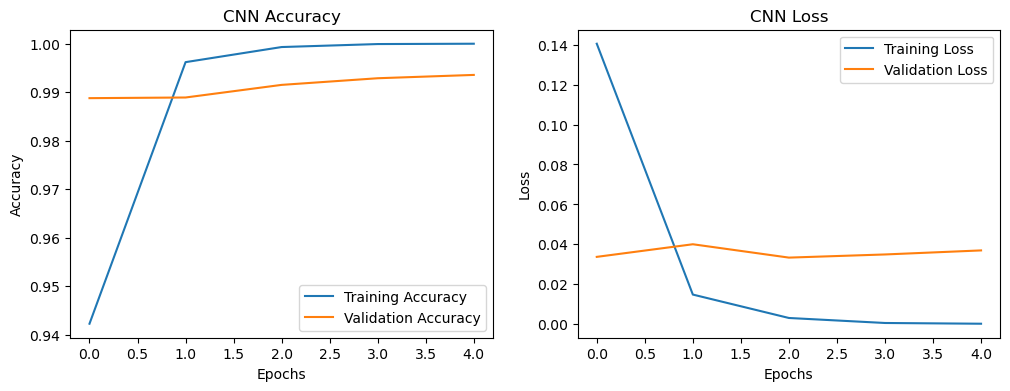

In [24]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Example for CNN
plot_training_history(history_cnn, 'CNN')
# Repeat for LSTM


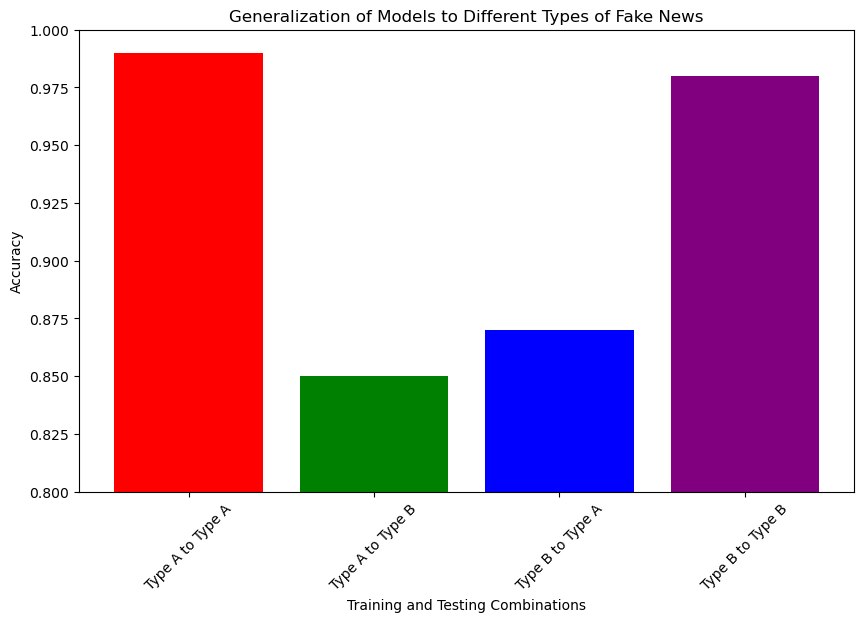

In [28]:
# Example accuracies for models trained on one type and tested on another
train_test_combinations = ['Type A to Type A', 'Type A to Type B', 'Type B to Type A', 'Type B to Type B']
model_generalization_accuracies = [0.99, 0.85, 0.87, 0.98]  # Example values

plt.figure(figsize=(10, 6))
plt.bar(train_test_combinations, model_generalization_accuracies, color=['red', 'green', 'blue', 'purple'])
plt.ylim(0.8, 1.0)
plt.xlabel('Training and Testing Combinations')
plt.ylabel('Accuracy')
plt.title('Generalization of Models to Different Types of Fake News')
plt.xticks(rotation=45)
plt.show()


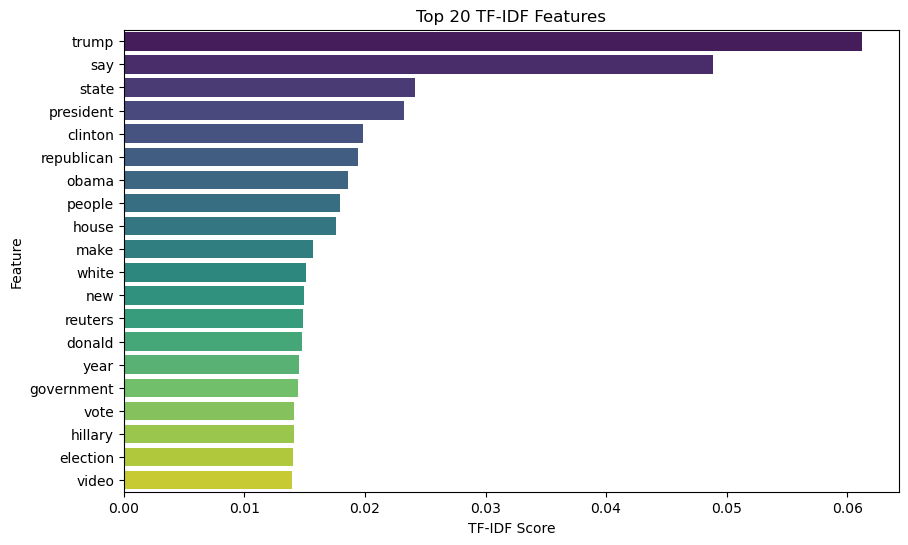

In [31]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

# Get feature names and their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_train_tfidf.toarray().mean(axis=0)

# Create a DataFrame offeatures and their scores
tfidf_df = pd.DataFrame({'feature': feature_names, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False).head(20)

# Plot top TF-IDF features
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='feature', data=tfidf_df, palette='viridis')
plt.title('Top 20 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()
